## Experiment 3: Regression Analysis using Linear and Regularized Models
   
R Padmashri   
3122 23 5001 093   
CSE - B

### Imports

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, validation_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

### Dataset

In [2]:
TRAIN_PATH = "train.csv"
TEST_PATH  = "test.csv"

train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)

TARGET = "Loan Sanction Amount (USD)"

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)
print("Target column:", TARGET)
train_df = train_df.dropna(subset=[TARGET]).copy()

Train shape: (30000, 24)
Test shape : (20000, 23)
Target column: Loan Sanction Amount (USD)


In [3]:
train_df

Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56       1933.05   
1         C-33999  America Calderone      M   32       4952.91   
2          C-3770      Rosetta Verne      F   65        988.19   
3         C-26480         Zoe Chitty      F   65           NaN   
4         C-23459       Afton Venema      F   31       2614.77   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38       4969.41   
29996     C-32511       Silas Slaugh      M   20       1606.88   
29997      C-5192       Carmelo Lone      F   49           NaN   
29998     C-12172      Carolann Osby      M   38       2417.71   
29999     C-33003  Bridget Garibaldi      F   63       3068.24   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working                    NaN   
2                 High             Pensioner                    NaN   
3                 High             Pensioner                    NaN   
4                  Low               Working  High skill tech staff   
...                ...                   ...                    ...   
29995              Low  Commercial associate               Managers   
29996              Low               Working               Laborers   
29997              Low               Working            Sales staff   
29998              Low               Working         Security staff   
29999             High             Pensioner                    NaN   

         Location  Loan Amount Request (USD)  ...  Credit Score  \
0      Semi-Urban                   72809.58  ...        809.44   
1      Semi-Urban                   46837.47  ...        780.40   
2      Semi-Urban                   45593.04  ...        833.15   
3           Rural                   80057.92  ...        832.70   
4      Semi-Urban                  113858.89  ...        745.55   
...           ...                        ...  ...           ...   
29995       Urban                   76657.90  ...        869.61   
29996  Semi-Urban                   66595.14  ...        729.41   
29997       Urban                   81410.08  ...           NaN   
29998  Semi-Urban                  142524.10  ...        677.27   
29999       Rural                  156290.54  ...        815.44   

      No. of Defaults Has Active Credit Card  Property ID  Property Age  \
0                   0                    NaN          746       1933.05   
1                   0            Unpossessed          608       4952.91   
2                   0            Unpossessed          546        988.19   
3                   1            Unpossessed          890           NaN   
4                   1                 Active          715       2614.77   
...               ...                    ...          ...           ...   
29995               0            Unpossessed          566       4969.41   
29996               0               Inactive          175       1606.88   
29997               0                 Active          959           NaN   
29998               1            Unpossessed          375       2417.71   
29999               0                 Active          344       3068.24   

       Property Type Property Location  Co-Applicant  Property Price  \
0                  4             Rural             1       119933.46   
1                  2             Rural             1        54791.00   
2                  2             Urban             0        72440.58   
3                  2        Semi-Urban             1       121441.51   
4                  4        Semi-Urban             1       208567.91   
...              ...               ...           ...             ...   
29995              4             Urban             1       111096.56   
29996              3             Urban             1        73453.94   
29997 

In [4]:
DROP_COLS = ["Customer ID", "Name", "Property ID","Gender"]
X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]

for c in DROP_COLS:
    if c in X.columns:
        X = X.drop(columns=[c])
    if c in test_df.columns:
        test_df = test_df.drop(columns=[c])

In [5]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("\nNumeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Numeric columns: 11
Categorical columns: 8


In [6]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


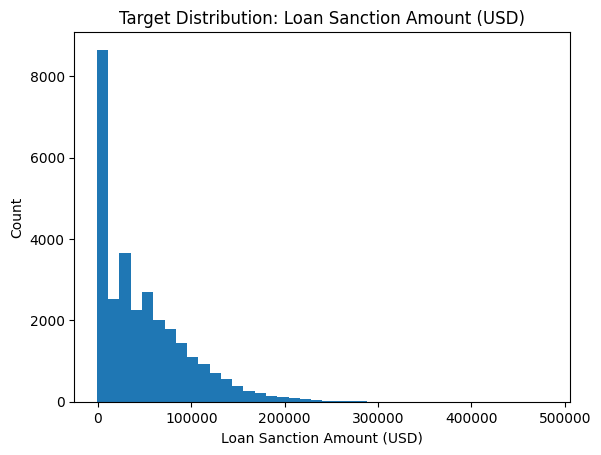

In [7]:
plt.figure()
plt.hist(y, bins=40)
plt.title("Target Distribution: Loan Sanction Amount (USD)")
plt.xlabel("Loan Sanction Amount (USD)")
plt.ylabel("Count")
plt.show()


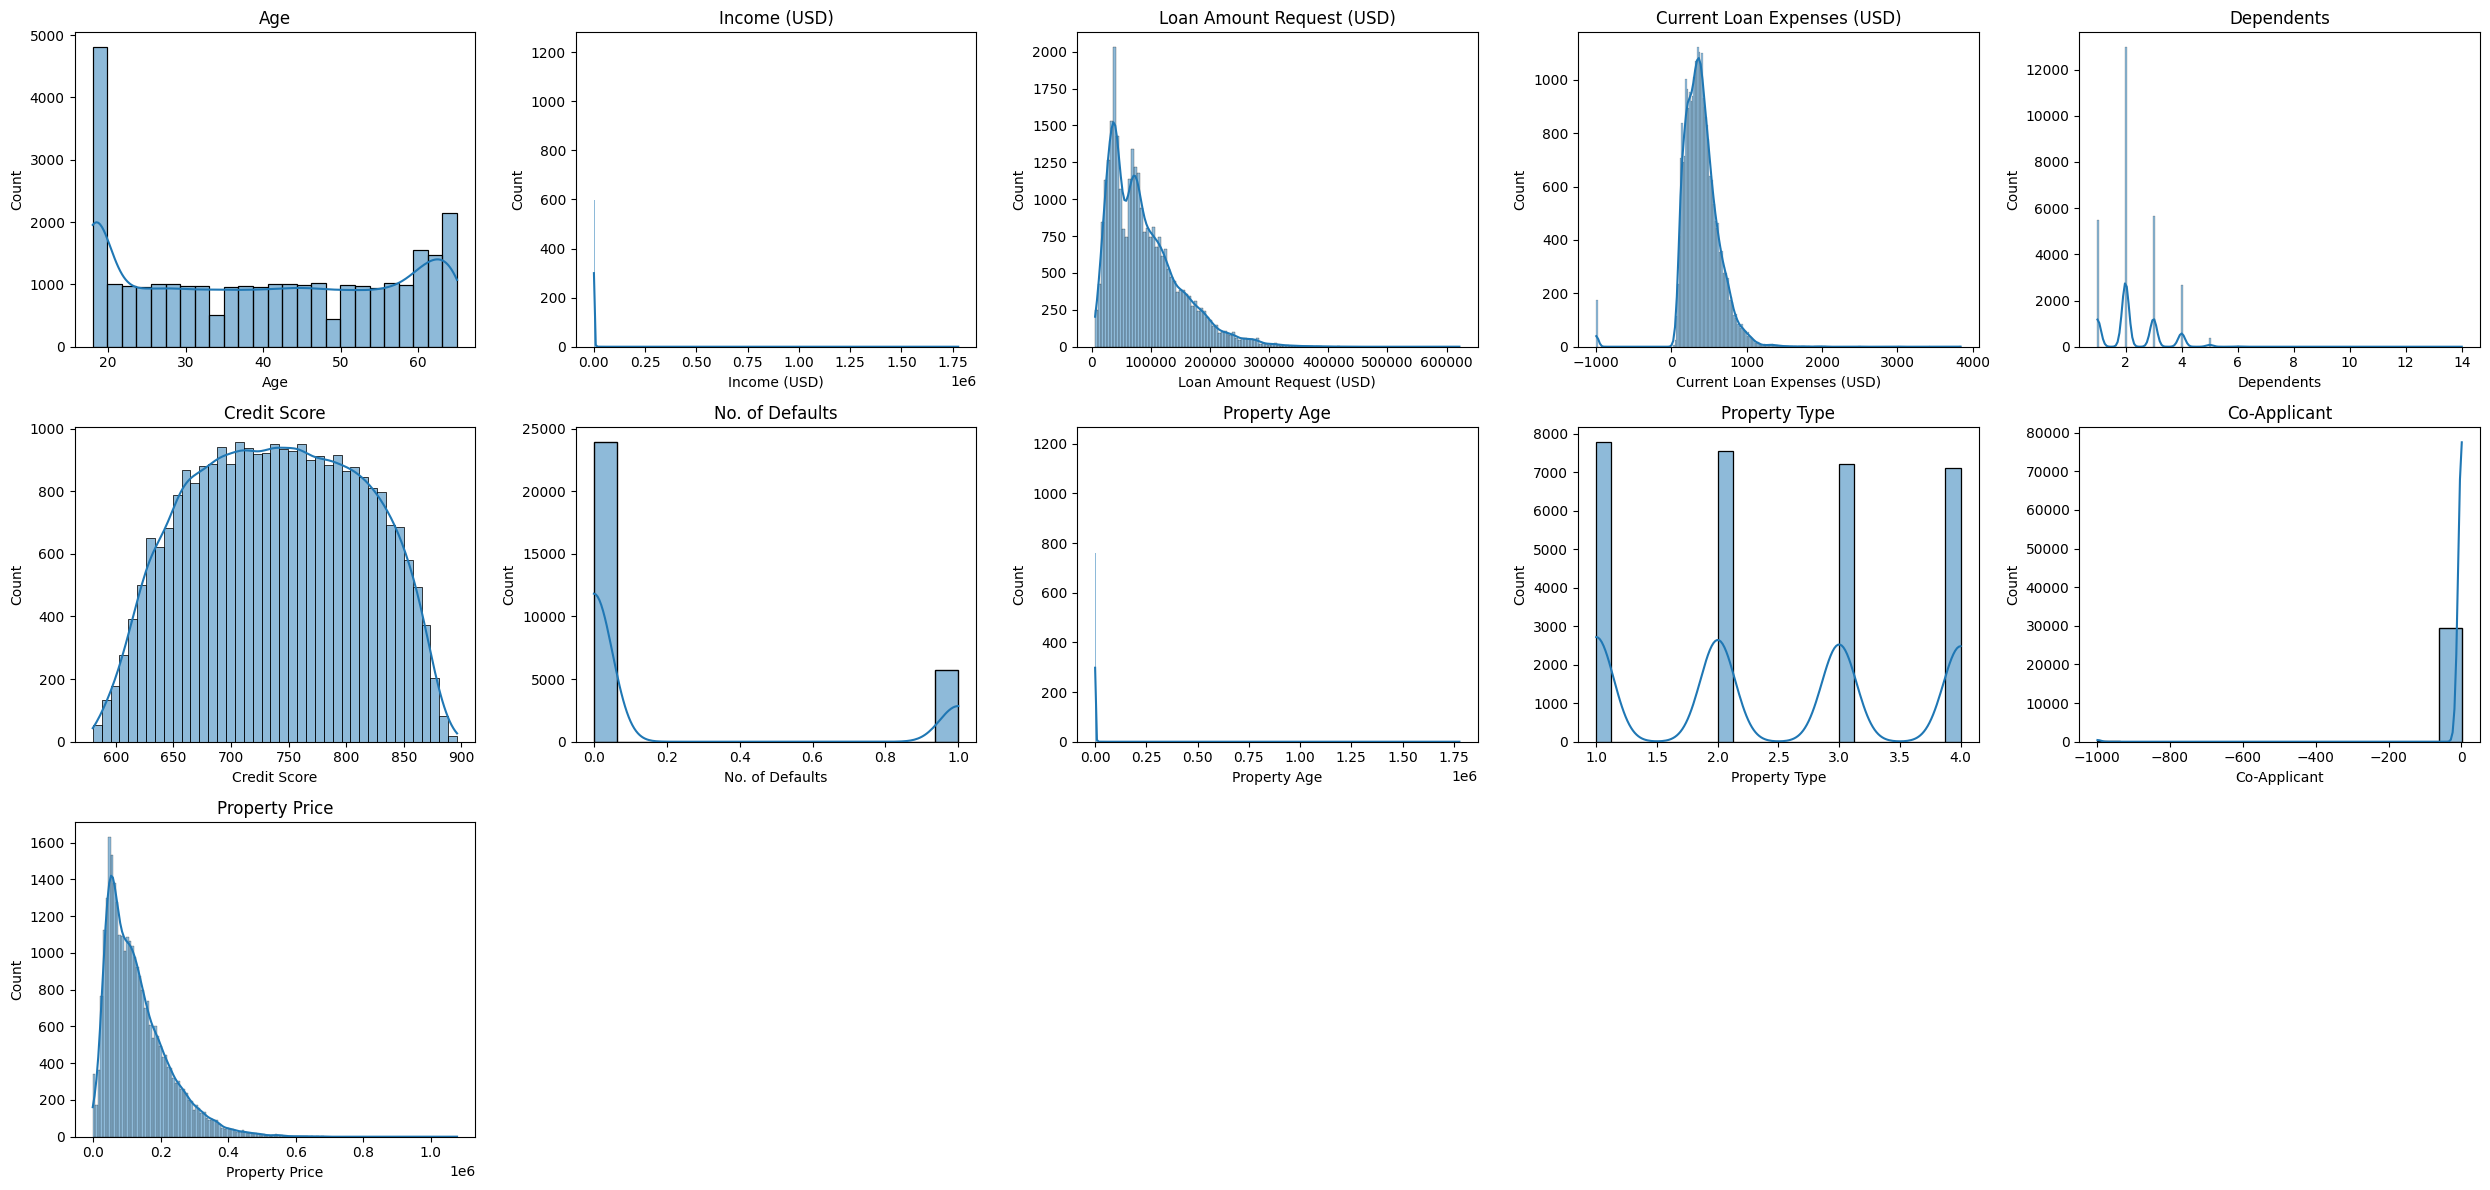

In [8]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

n = len(num_cols)
cols = 5
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


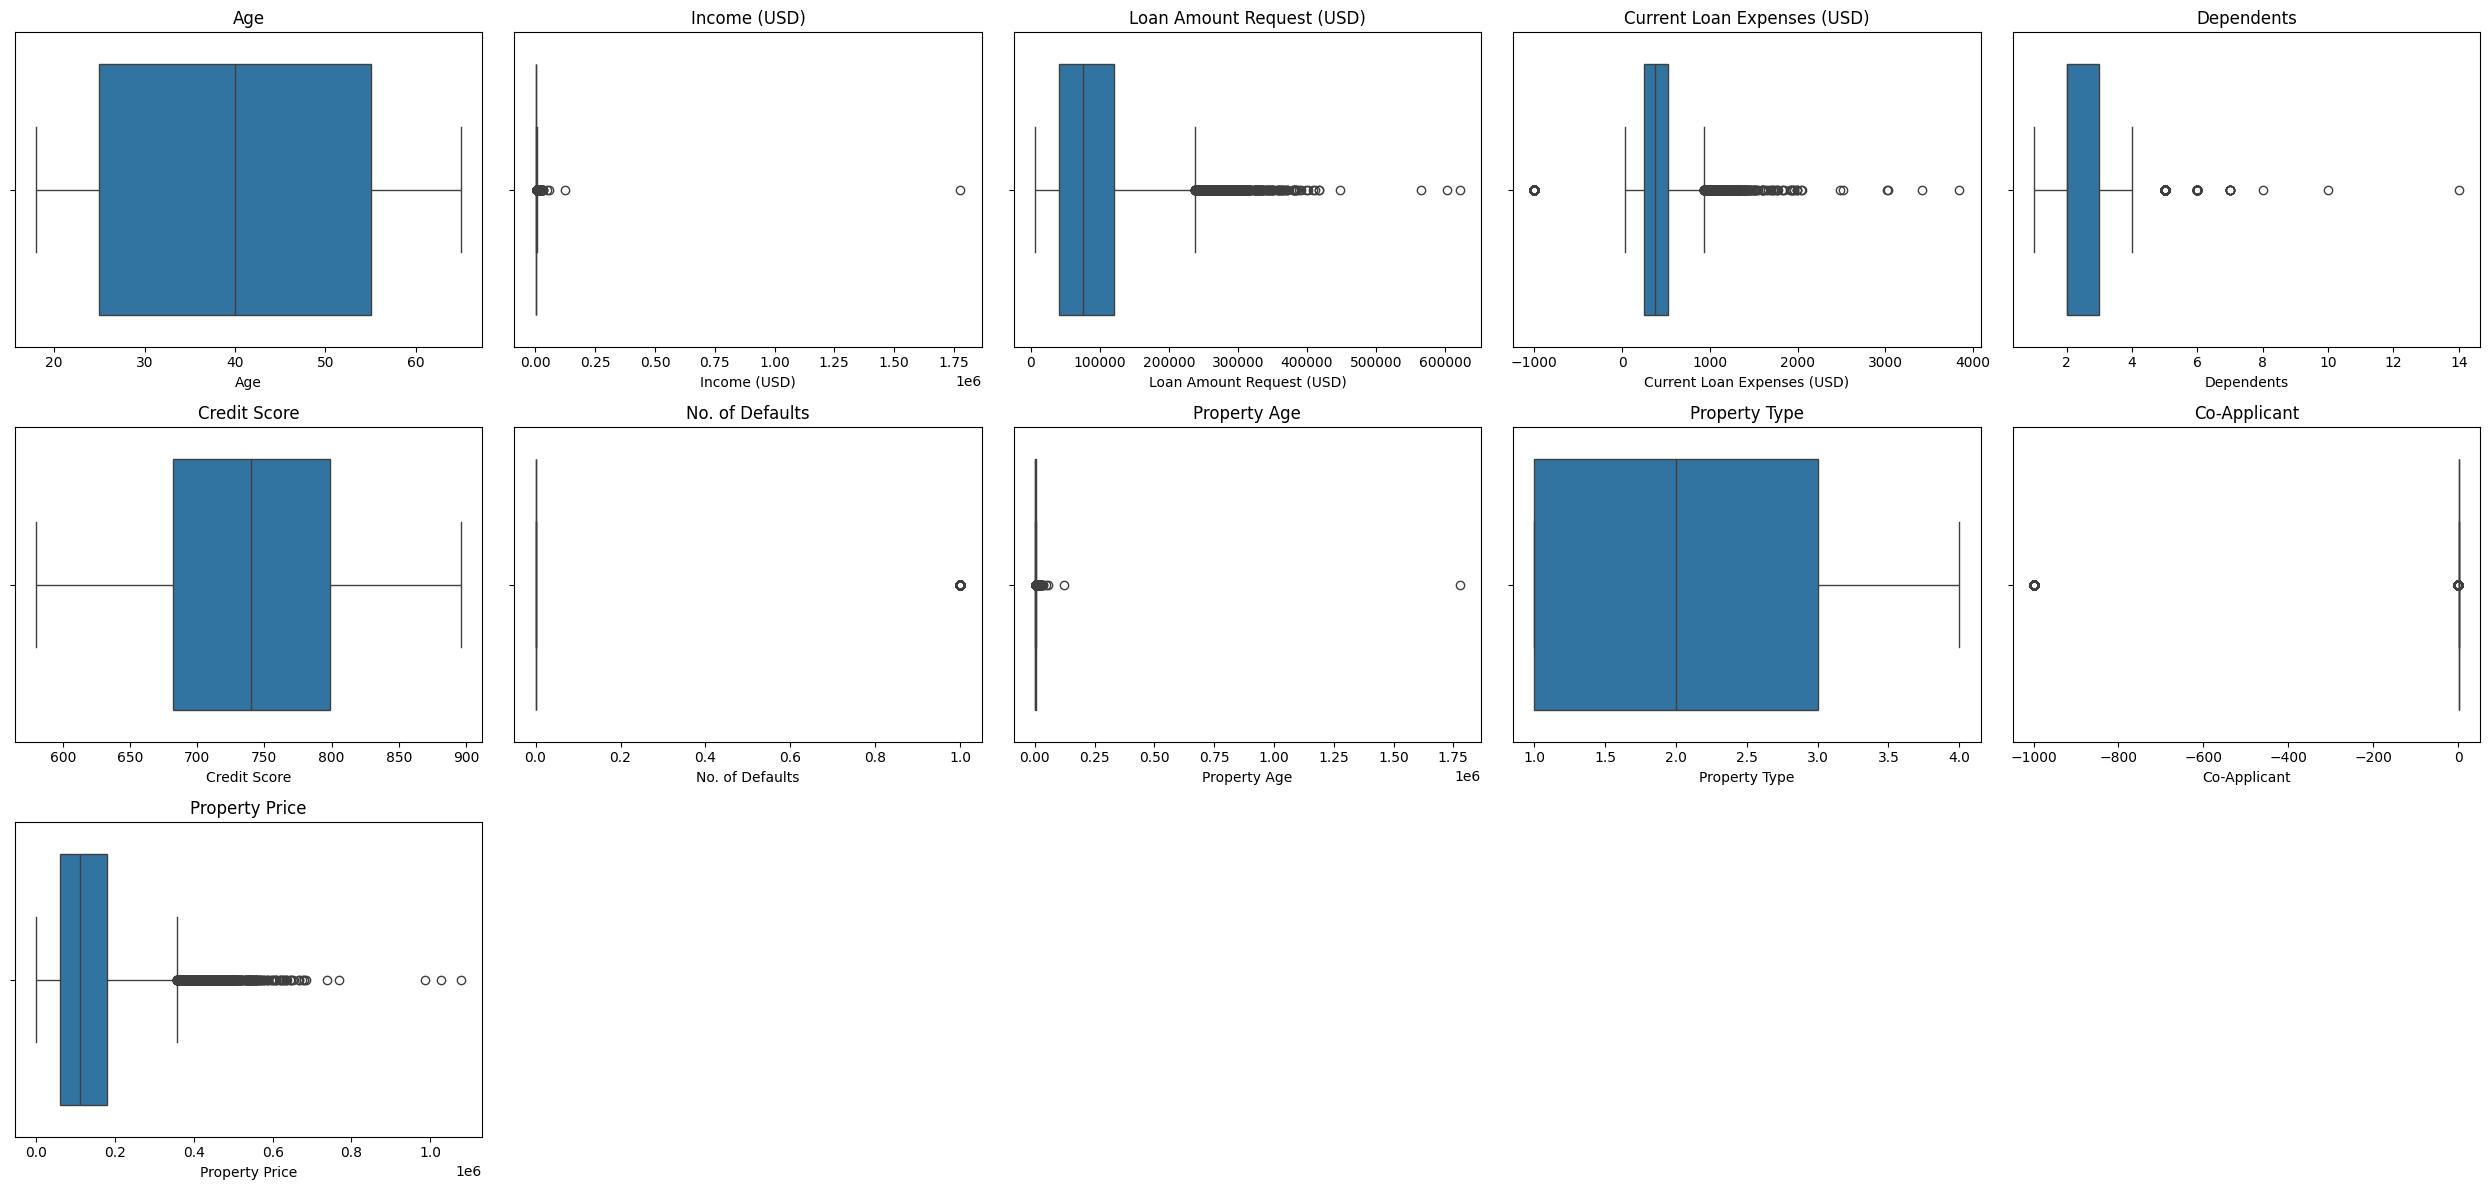

In [9]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

n = len(num_cols)
cols = 5
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


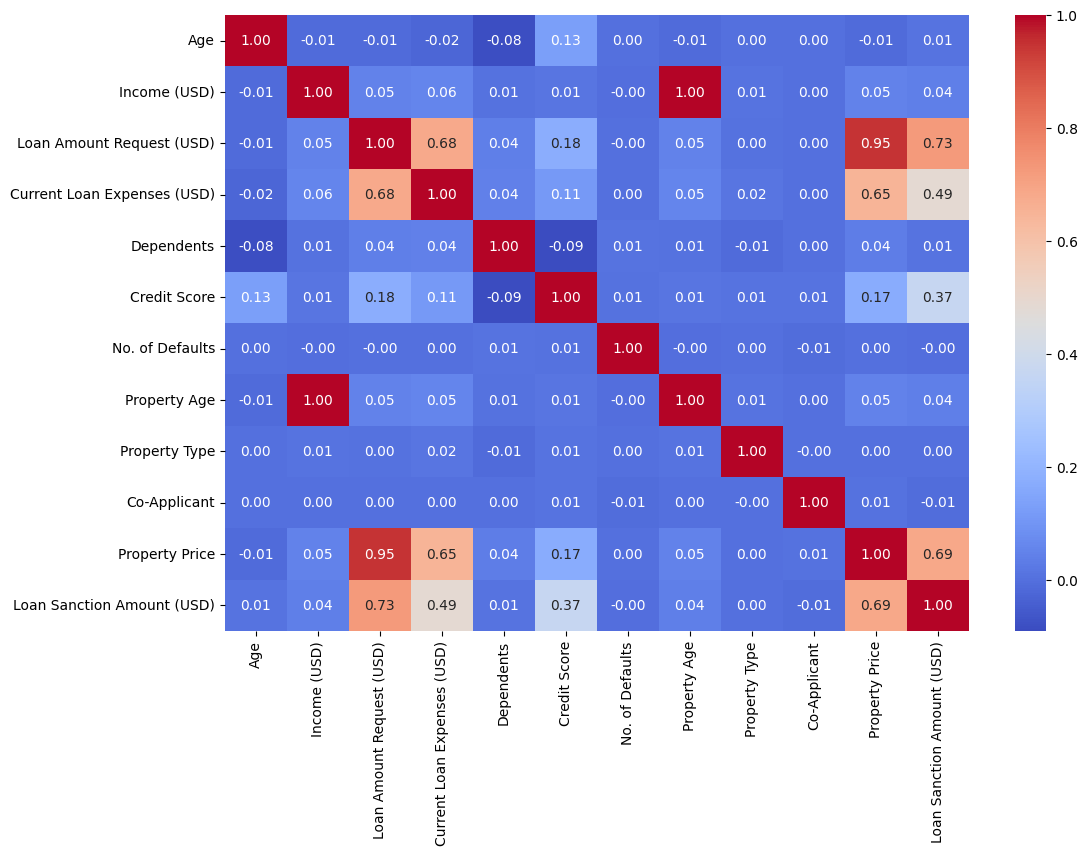

In [10]:


corr = train_df[num_cols + [TARGET]].corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


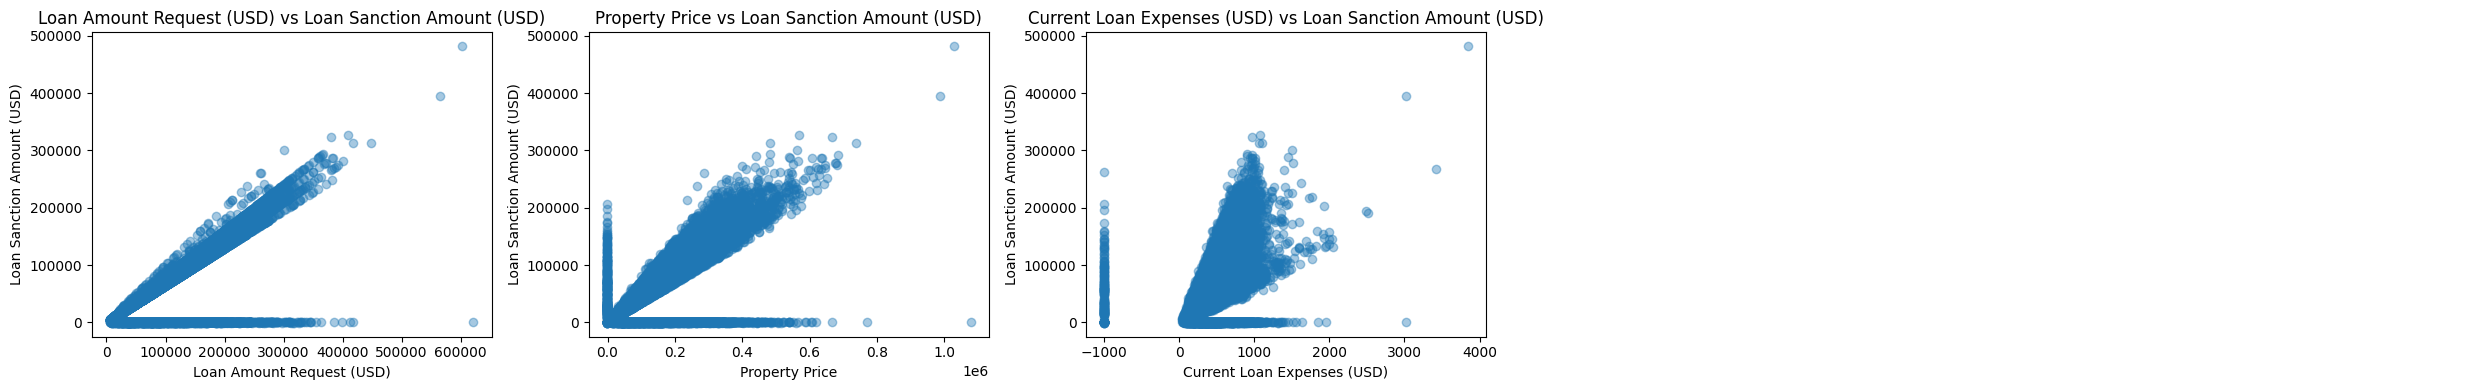

In [11]:
corr_df = train_df[[TARGET] + [c for c in num_cols if c in train_df.columns]].corr(numeric_only=True)[TARGET].drop(TARGET)
top3 = corr_df.abs().sort_values(ascending=False).head(3).index.tolist()
n = len(top3)
cols = 5
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, feat in enumerate(top3):
    axes[i].scatter(train_df[feat], train_df[TARGET], alpha=0.4)
    axes[i].set_title(f"{feat} vs {TARGET}")
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel(TARGET)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Baseline Linear Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2


def fit_time_model(pipeline, Xtr, ytr):
    t0 = time.perf_counter()
    pipeline.fit(Xtr, ytr)
    t1 = time.perf_counter()
    return t1 - t0


In [13]:
lin_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

lin_time = fit_time_model(lin_pipe, X_train, y_train)

lin_pred = lin_pipe.predict(X_test)
lin_mae, lin_mse, lin_rmse, lin_r2 = regression_metrics(y_test, lin_pred)


In [14]:
print("Base Linear Regression Performance")
print(f"MAE  : {lin_mae:.4f}")
print(f"MSE  : {lin_mse:.4f}")
print(f"RMSE : {lin_rmse:.4f}")
print(f"R2   : {lin_r2:.4f}")
print(f"Training Time (s): {lin_time:.4f}")


Base Linear Regression Performance
MAE  : 21589.8579
MSE  : 1018911831.6068
RMSE : 31920.3984
R2   : 0.5511
Training Time (s): 0.1594


## Regularized Regression Models

### Ridge Regression
Ridge Regression was used to reduce coefficient magnitude and handle multicollinearity.

### Lasso Regression
Lasso Regression was applied to perform feature selection by shrinking less important coefficients to zero.

### Elastic Net Regression
Elastic Net combines the benefits of Ridge and Lasso, providing a balance between sparsity and stability.


In [15]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time

cv = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", Ridge(random_state=42))
])

lasso_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", Lasso(max_iter=20000, random_state=42))
])

enet_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", ElasticNet(max_iter=20000, random_state=42))
])

ridge_grid = {"model__alpha": [0.01, 0.1, 1, 10, 100]}
lasso_grid = {"model__alpha": [0.001, 0.01, 0.1, 1, 10]}
enet_grid  = {
    "model__alpha": [0.01, 0.1, 1, 10],
    "model__l1_ratio": [0.2, 0.5, 0.8]
}

def run_grid(pipe, grid):
    gs = GridSearchCV(pipe, grid, scoring="r2", cv=cv, n_jobs=-1)
    gs.fit(X_train, y_train)
    return gs

ridge_gs = run_grid(ridge_pipe, ridge_grid)
lasso_gs = run_grid(lasso_pipe, lasso_grid)
enet_gs  = run_grid(enet_pipe, enet_grid)

print("Hyperparameter Tuning Results")
print("Ridge  :", ridge_gs.best_params_, "Best CV R2:", ridge_gs.best_score_)
print("Lasso  :", lasso_gs.best_params_, "Best CV R2:", lasso_gs.best_score_)
print("Enet   :", enet_gs.best_params_,  "Best CV R2:", enet_gs.best_score_)


Hyperparameter Tuning Results
Ridge  : {'model__alpha': 100} Best CV R2: 0.5786469026956838
Lasso  : {'model__alpha': 10} Best CV R2: 0.5784551465036821
Enet   : {'model__alpha': 0.1, 'model__l1_ratio': 0.5} Best CV R2: 0.5798383810209511


In [16]:
def cv_metrics(pipe):
    y_pred = cross_val_predict(pipe, X_train, y_train, cv=cv, n_jobs=-1)
    mae  = mean_absolute_error(y_train, y_pred)
    mse  = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_train, y_pred)
    return mae, mse, rmse, r2

lin_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

ridge_best = ridge_gs.best_estimator_
lasso_best = lasso_gs.best_estimator_
enet_best  = enet_gs.best_estimator_

results = {
    "Linear Regression": cv_metrics(lin_pipe),
    "Ridge Regression":  cv_metrics(ridge_best),
    "Lasso Regression":  cv_metrics(lasso_best),
    "Elastic Net":       cv_metrics(enet_best)
}

print("\nCross-Validation Performance (K = 5)")
for model, (mae, mse, rmse, r2) in results.items():
    print(model)
    print(f"MAE: {mae:.4f}  MSE: {mse:.4f}  RMSE: {rmse:.4f}  R2: {r2:.4f}\n")



Cross-Validation Performance (K = 5)
Linear Regression
MAE: 21508.1142  MSE: 984727093.1145  RMSE: 31380.3616  R2: 0.5790

Ridge Regression
MAE: 21524.7473  MSE: 983019851.6404  RMSE: 31353.1474  R2: 0.5797

Lasso Regression
MAE: 21497.8842  MSE: 983433813.8426  RMSE: 31359.7483  R2: 0.5796

Elastic Net
MAE: 21732.7267  MSE: 980735482.7595  RMSE: 31316.6965  R2: 0.5807



In [17]:
lin_pipe.fit(X_train, y_train)
lin_pred   = lin_pipe.predict(X_test)
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)
enet_pred  = enet_best.predict(X_test)
model_names = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net"]
predictions = [lin_pred, ridge_pred, lasso_pred, enet_pred]
metrics_data = []

for name, pred in zip(model_names, predictions):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    metrics_data.append([name, mae, mse, rmse, r2])

table_3 = pd.DataFrame(metrics_data, columns=["Model", "MAE", "MSE", "RMSE", "R2"])

print("\n" + "="*40)
print("Table 3: Test Set Performance")
print("="*40)
print(table_3.round(4).to_string(index=False))


Table 3: Test Set Performance
            Model        MAE          MSE       RMSE     R2
Linear Regression 21589.8579 1.018912e+09 31920.3984 0.5511
 Ridge Regression 21582.3204 1.017227e+09 31893.9988 0.5518
 Lasso Regression 21564.5711 1.017745e+09 31902.1118 0.5516
      Elastic Net 21751.6900 1.018489e+09 31913.7778 0.5513


In [18]:
try:
    coef_data = {
        "Linear": lin_pipe.named_steps['model'].coef_,
        "Ridge": ridge_best.named_steps['model'].coef_,
        "Lasso": lasso_best.named_steps['model'].coef_,
        "Elastic Net": enet_best.named_steps['model'].coef_
    }

    table_4 = pd.DataFrame(coef_data)


    table_4.insert(0, "Feature", [f"Feature {i+1}" for i in range(len(table_4))])

    print("\n" + "="*40)
    print("Table 4: Coefficient Comparison")
    print("="*40)
    print(table_4.round(4).to_string(index=False))

except AttributeError:
    print("\nCould not extract coefficients.")


Table 4: Coefficient Comparison
   Feature      Linear      Ridge      Lasso  Elastic Net
 Feature 1   -611.2941  -580.5143  -576.6711    -558.6418
 Feature 2  47656.5397  1039.4816     3.8451      97.4573
 Feature 3  35365.3700 33825.7866 35169.9575   25155.4719
 Feature 4  -1249.5573 -1046.9052 -1195.3712     319.8903
 Feature 5   -100.1356   -98.1434   -87.8898     -73.8574
 Feature 6  11637.8108 11622.6246 11649.6648   11286.2195
 Feature 7   -281.0038  -286.0285  -274.8641    -292.3420
 Feature 8 -47644.1150 -1031.7350     0.0000     -86.5072
 Feature 9   -203.0639  -200.9657  -194.1327    -201.1066
Feature 10   -510.3661  -516.7131  -502.3532    -531.9812
Feature 11  -1328.1109    23.9503 -1143.8051    7064.8769
Feature 12  -4831.9845 -2818.7806 -6352.0233    -705.7281
Feature 13   4831.9845  2818.7806     0.0000     705.7280
Feature 14  12582.6388   129.2804     0.0000      11.4157
Feature 15  -1064.1793  -717.2601    63.6791     136.2042
Feature 16   6613.8995  2989.5967  4449

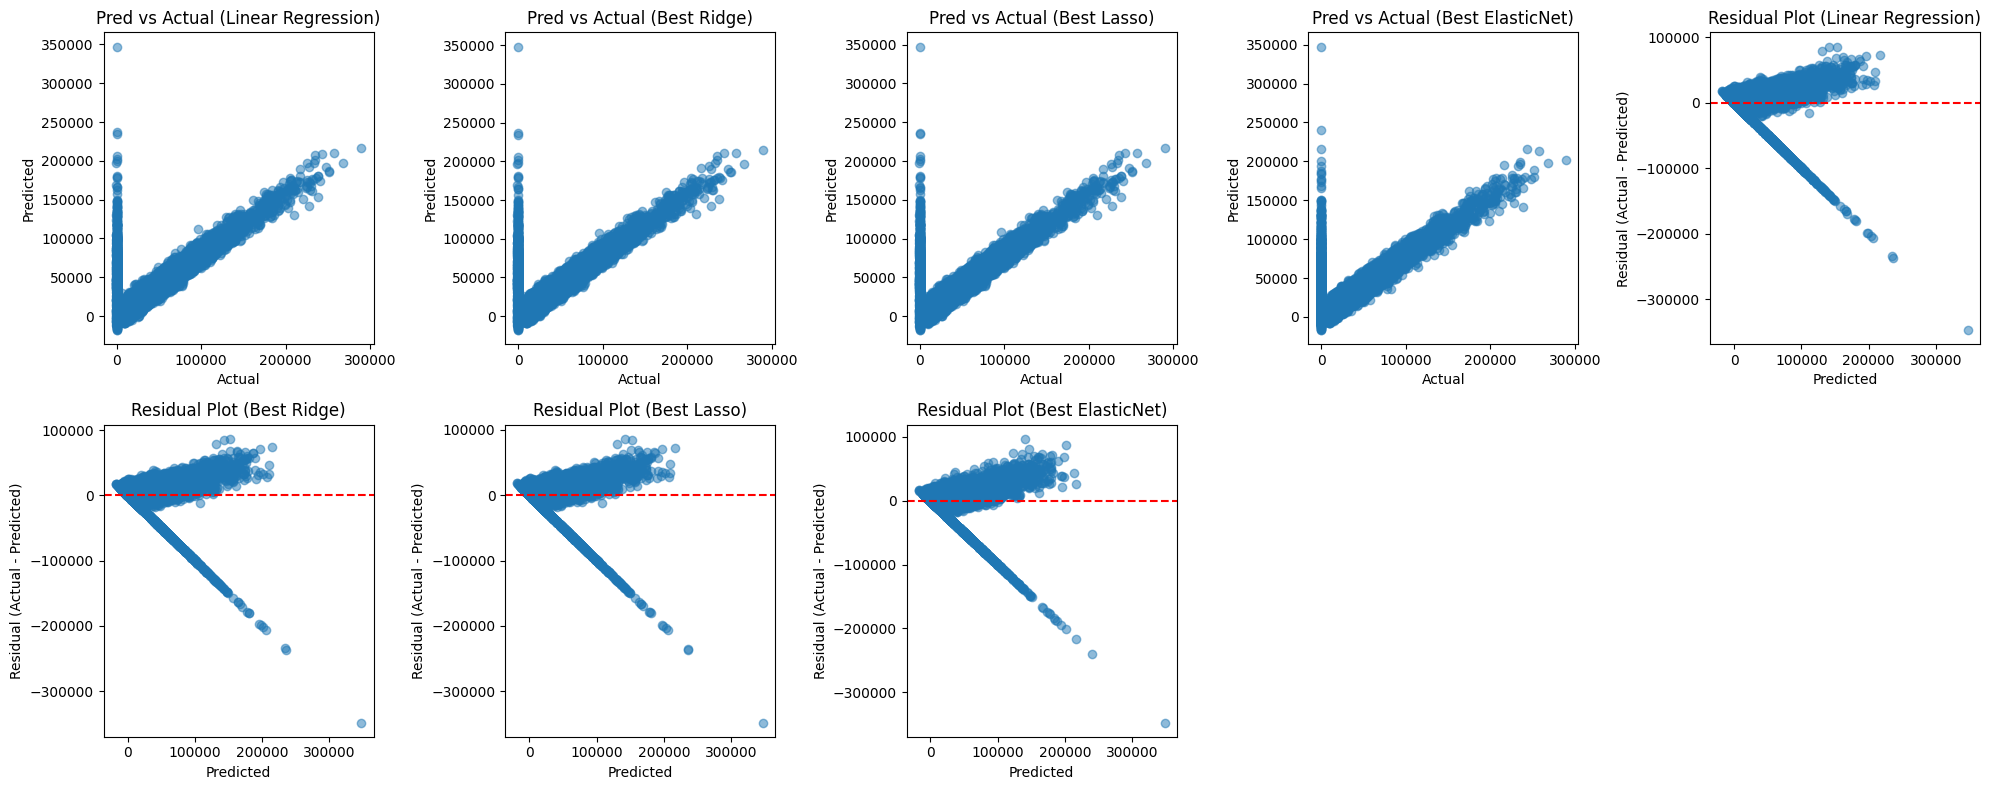

In [19]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "Best Ridge", "Best Lasso", "Best ElasticNet"]
predictions = [lin_pred, ridge_pred, lasso_pred, enet_pred]

cols = 5
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
axes = axes.flatten()

for i, (pred, model) in enumerate(zip(predictions, models)):
    axes[i].scatter(y_test, pred, alpha=0.5)
    axes[i].set_title(f"Pred vs Actual ({model})")
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")

for i, (pred, model) in enumerate(zip(predictions, models), start=4):
    residuals = y_test - pred
    axes[i].scatter(pred, residuals, alpha=0.5)
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_title(f"Residual Plot ({model})")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Residual (Actual - Predicted)")

for j in range(len(predictions)*2, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


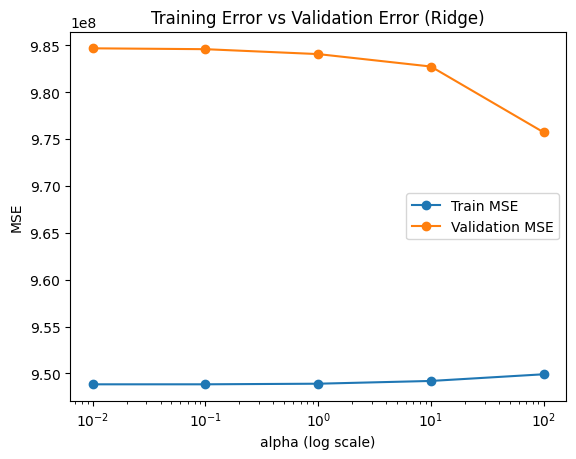

In [20]:

alphas = np.array([0.01, 0.1, 1, 10, 100])

train_scores, val_scores = validation_curve(
    Ridge(random_state=42),
    X=preprocess.fit_transform(X_train),
    y=y_train,
    param_name="alpha",
    param_range=alphas,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

train_mse = -train_scores.mean(axis=1)
val_mse   = -val_scores.mean(axis=1)

plt.figure()
plt.plot(alphas, train_mse, marker="o", label="Train MSE")
plt.plot(alphas, val_mse, marker="o", label="Validation MSE")
plt.xscale("log")
plt.title("Training Error vs Validation Error (Ridge)")
plt.xlabel("alpha (log scale)")
plt.ylabel("MSE")
plt.legend()
plt.show()


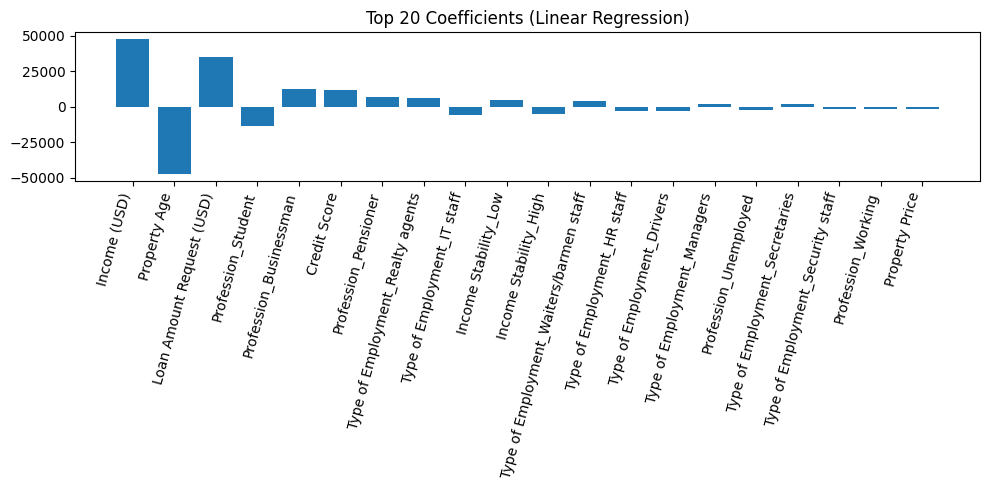

In [21]:
def get_feature_names(preprocessor):
    num_features = num_cols
    ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    cat_features = ohe.get_feature_names_out(cat_cols).tolist()
    return num_features + cat_features

def get_coefs(model_pipeline):
    pre = model_pipeline.named_steps["preprocess"]
    model = model_pipeline.named_steps["model"]
    feat_names = get_feature_names(pre)
    coefs = model.coef_
    return feat_names, coefs


lin_feats, lin_coefs = get_coefs(lin_pipe)
ridge_feats, ridge_coefs = get_coefs(ridge_best)
lasso_feats, lasso_coefs = get_coefs(lasso_best)
enet_feats, enet_coefs = get_coefs(enet_best)


top_k = 20
idx = np.argsort(np.abs(lin_coefs))[::-1][:top_k]

plt.figure(figsize=(10, 5))
plt.bar(np.array(lin_feats)[idx], lin_coefs[idx])
plt.title(f"Top {top_k} Coefficients (Linear Regression)")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()

In [22]:
test_df

Age  Income (USD) Income Stability            Profession  \
0       47       3472.69              Low  Commercial associate   
1       57       1184.84              Low               Working   
2       52       1266.27              Low               Working   
3       65       1369.72             High             Pensioner   
4       60       1939.23             High             Pensioner   
...    ...           ...              ...                   ...   
19995   19       1349.60              Low  Commercial associate   
19996   22       2019.78              Low               Working   
19997   19       2252.03              Low               Working   
19998   21       1845.35              Low               Working   
19999   21       5233.16              Low               Working   

      Type of Employment    Location  Loan Amount Request (USD)  \
0               Managers  Semi-Urban                  137088.98   
1            Sales staff       Rural                  104771.59   
2                    NaN  Semi-Urban                  176684.91   
3                    NaN       Rural                   97009.18   
4                    NaN       Urban                  109980.00   
...                  ...         ...                        ...   
19995                NaN  Semi-Urban                  156766.97   
19996         Core staff       Urban                   47924.80   
19997         Core staff  Semi-Urban                   18629.88   
19998                NaN  Semi-Urban                   95430.73   
19999           Laborers  Semi-Urban                  107966.03   

       Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  \
0                           396.72              N              N         2.0   
1                           463.76              Y              Y         2.0   
2                           493.15              N              Y         3.0   
3                           446.15              N              Y         2.0   
4                           370.10              N              N         NaN   
...                            ...            ...            ...         ...   
19995                       500.59              Y              Y         4.0   
19996                       243.02              Y              Y         NaN   
19997                       101.88              Y              N         1.0   
19998                       271.31              N              Y         2.0   
19999                       983.45              Y              Y         3.0   

       Credit Score  No. of Defaults Has Active Credit Card  Property Age  \
0            799.14                0            Unpossessed       3472.69   
1            833.31                0            Unpossessed       1184.84   
2            627.44                0            Unpossessed       1266.27   
3            833.20                0               Inactive       1369.72   
4               NaN                0                    NaN       1939.23   
...             ...              ...                    ...           ...   
19995        684.32                0               Inactive       1349.60   
19996        706.34                0               Inactive       2019.78   
19997        656.46                0               Inactive       2252.03   
19998        865.46                0            Unpossessed       1845.35   
19999        857.16                1                 Active       5233.16   

       Property Type Property Location Co-Applicant Property Price  
0                  2             Urban            1       236644.5  
1                  1             Rural            1       142357.3  
2                  1             Urban            1      300991.24  
3                  1        Semi-Urban            0       125612.1  
4                  4        Semi-Urban            1       180908.0  
...              ...               ...          ...            ...  
19995              4        

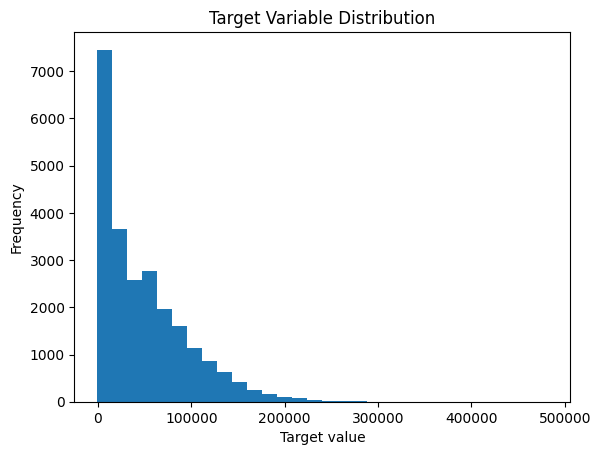

In [23]:
plt.figure()
plt.hist(y_train, bins=30)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Target Variable Distribution")
plt.show()


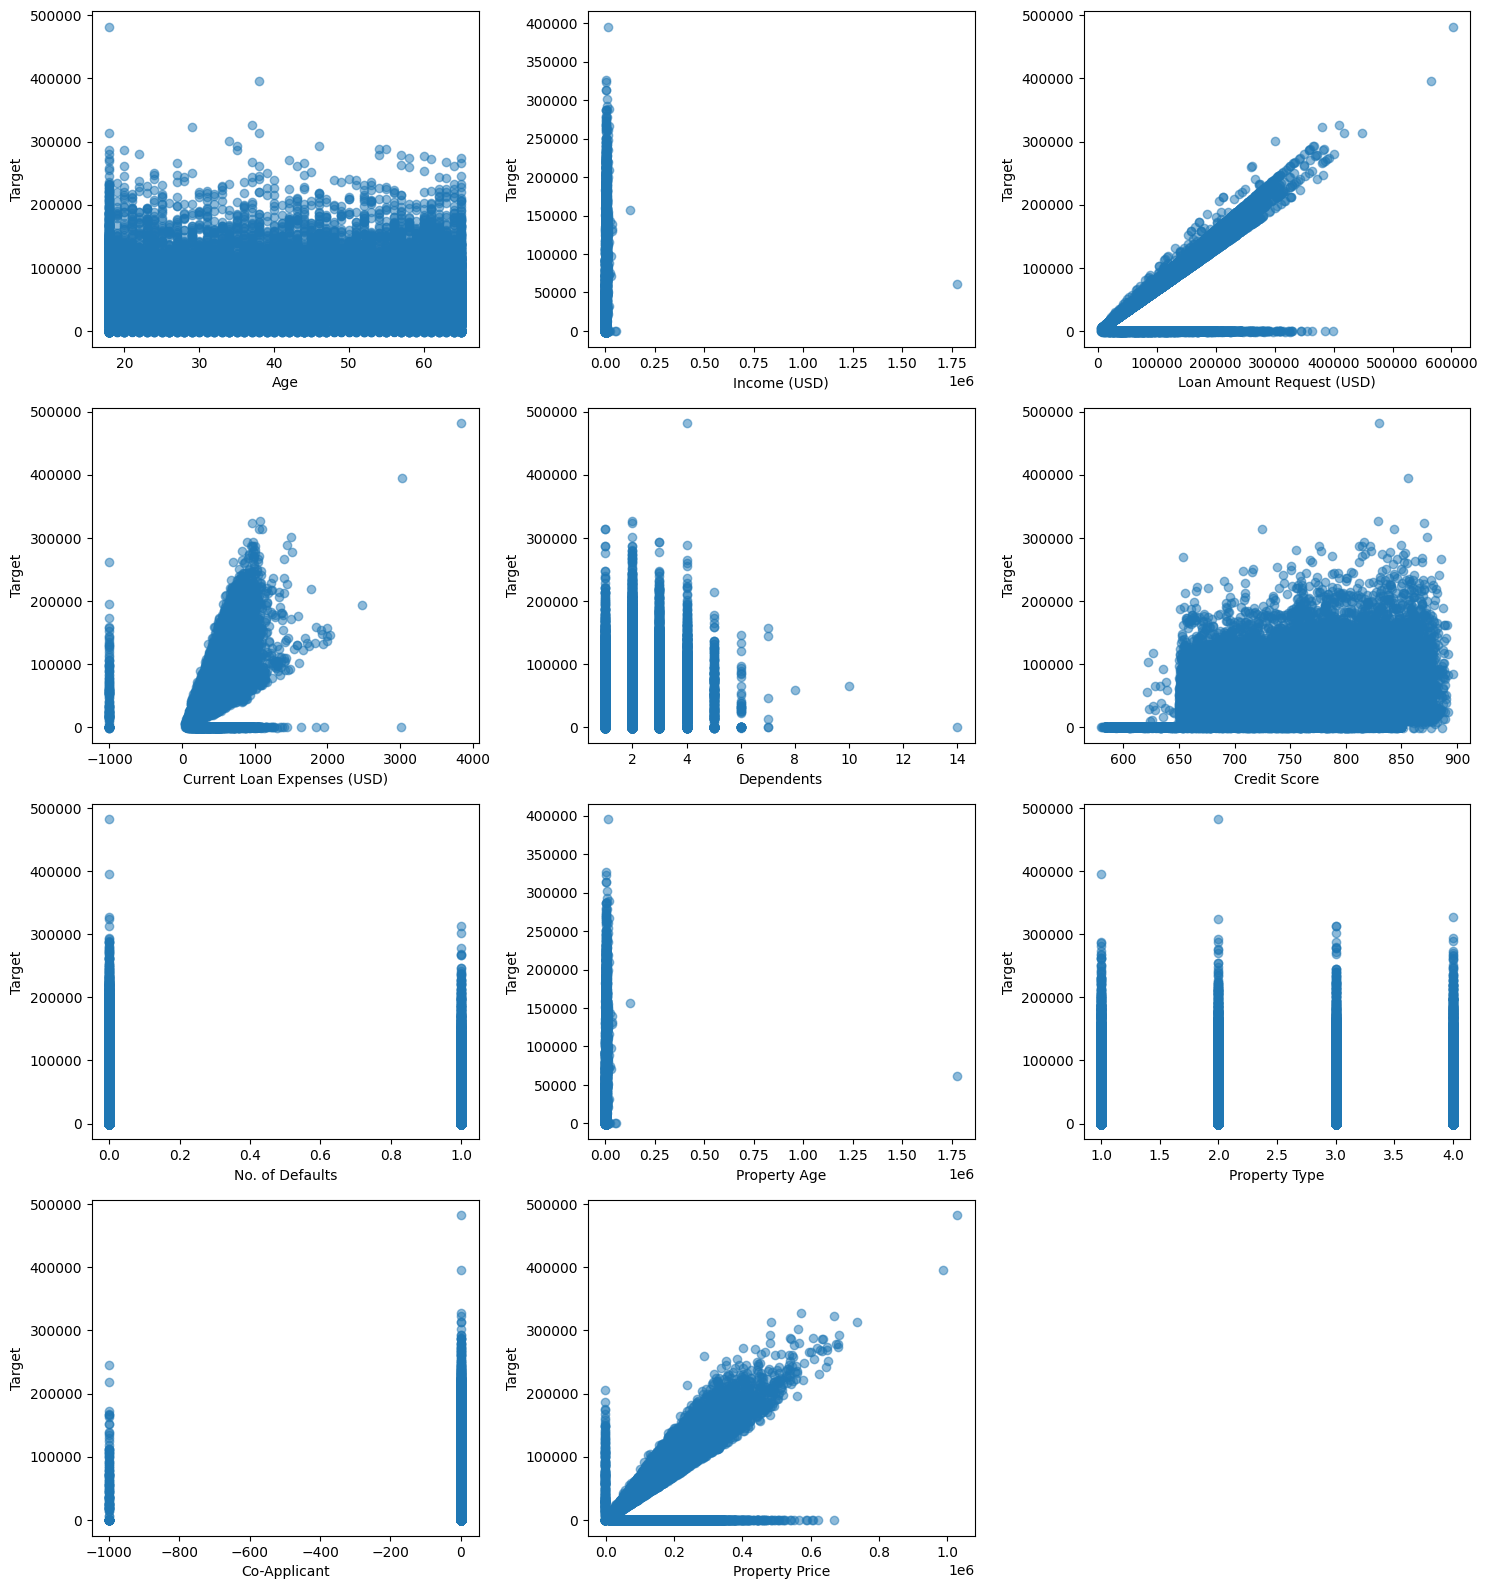

In [24]:
n_feats = len(num_cols)
cols = 3
rows = (n_feats + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].scatter(X_train[col], y_train, alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Target")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


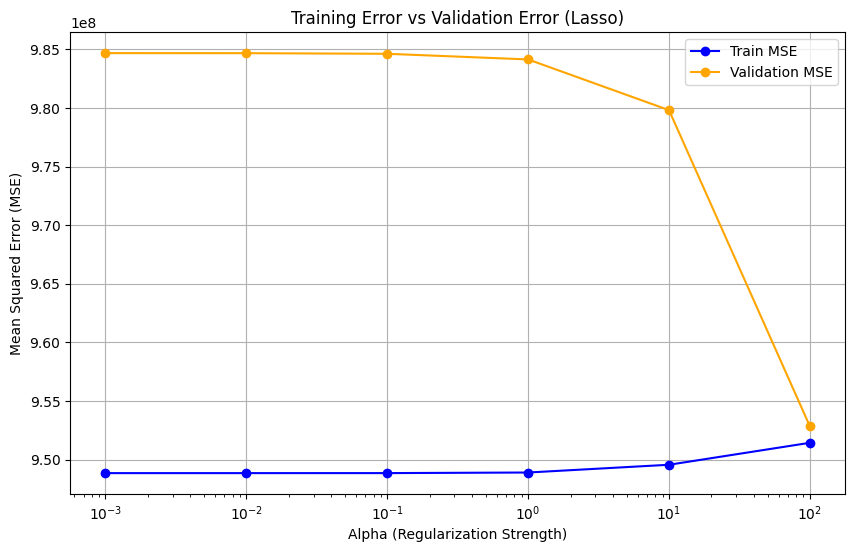

Alpha		Train MSE	Validation MSE
0.001		948838398		984689292
0.010		948838475		984684496
0.100		948839813		984631754
1.000		948890294		984150326
10.000		949552553		979820958
100.000		951428002		952826351


In [25]:
alphas_lasso = np.logspace(-3, 2, 6)


train_scores_lasso, val_scores_lasso = validation_curve(
    Lasso(random_state=42, max_iter=20000),
    X=preprocess.fit_transform(X_train),
    y=y_train,
    param_name="alpha",
    param_range=alphas_lasso,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)


train_mse_lasso = -train_scores_lasso.mean(axis=1)
val_mse_lasso = -val_scores_lasso.mean(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(alphas_lasso, train_mse_lasso, marker="o", label="Train MSE", color="blue")
plt.plot(alphas_lasso, val_mse_lasso, marker="o", label="Validation MSE", color="orange")


plt.xscale("log")
plt.title("Training Error vs Validation Error (Lasso)")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()


print("Alpha\t\tTrain MSE\tValidation MSE")
for a, t, v in zip(alphas_lasso, train_mse_lasso, val_mse_lasso):
    print(f"{a:.3f}\t\t{t:.0f}\t\t{v:.0f}")

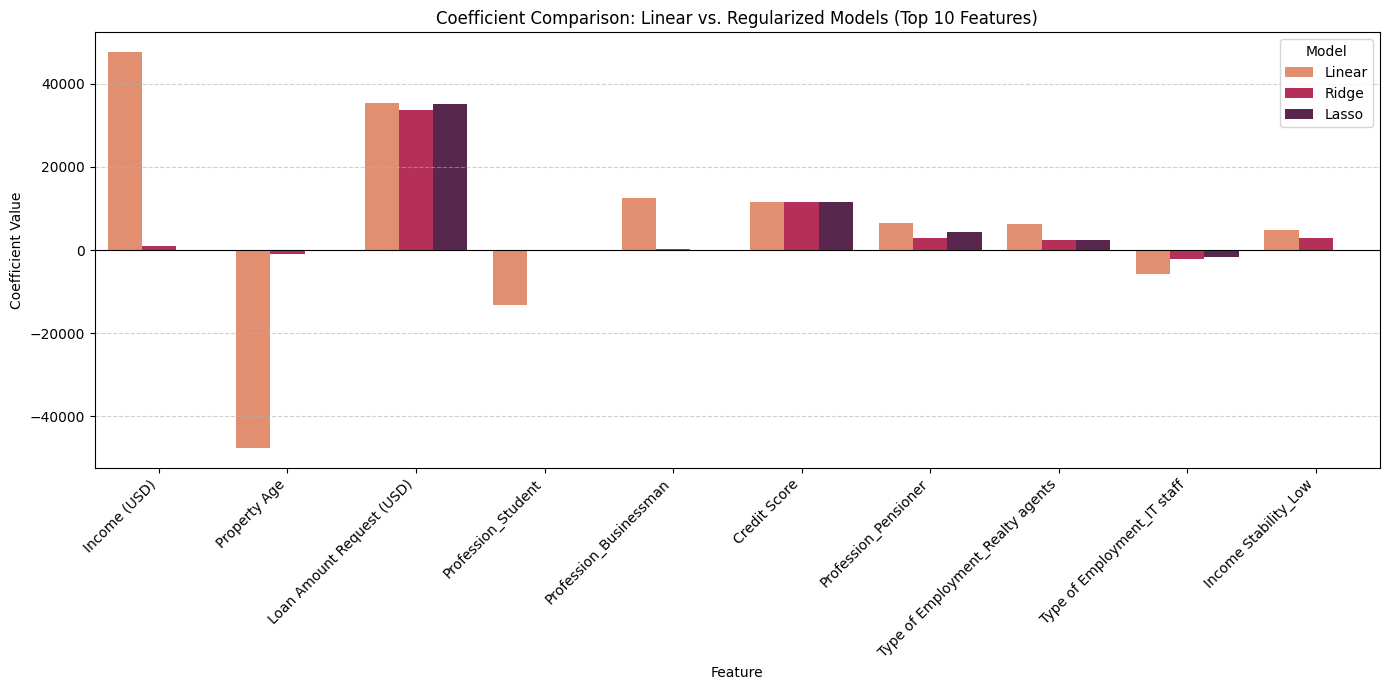

In [27]:
feat_names, lin_c = get_coefs(lin_pipe)
_, lasso_c = get_coefs(lasso_best)
_, ridge_c = get_coefs(ridge_best)
_, enet_c = get_coefs(enet_best)
coef_df = pd.DataFrame({
    "Feature": feat_names,
    "Linear": lin_c,
    "Ridge": ridge_c,
    "Lasso": lasso_c,
    "ElasticNet": enet_c
})
top_n = 10
coef_df["Linear_Abs"] = coef_df["Linear"].abs()
top_features = coef_df.sort_values("Linear_Abs", ascending=False).head(top_n)
df_melted = top_features.melt(
    id_vars="Feature",
    value_vars=["Linear", "Ridge", "Lasso"],
    var_name="Model",
    value_name="Coefficient"
)
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x="Feature", y="Coefficient", hue="Model", palette="rocket_r")
plt.title(f"Coefficient Comparison: Linear vs. Regularized Models (Top {top_n} Features)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coefficient Value")
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()